In [74]:
%reload_ext autoreload
%autoreload 2

In [75]:
import geometric_sampling as gs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from package_sampling.utils import inclusion_probabilities
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon

In [81]:
swiss_df = pd.read_csv('swiss.csv')
coords = swiss_df[['COORD_X', 'COORD_Y']].to_numpy()
N = len(coords)
n = 10
# probs = inclusion_probabilities(swiss_df['AREA'].to_numpy(), n)
rng = gs.random.rng()
# probs = rng.unequal_probabilities(n, N)
coords = coords[np.argsort(coords[:, 0])]
probs = np.sort(rng.unequal_probabilities(n, N))

In [17]:
N = 10000
n = 20
coords = rng.uniform_coordinates(0, 1000, (N, 2))
coords = coords[np.argsort(coords[:, 0])]
probs = np.sort(rng.unequal_probabilities(n, N))

In [77]:
N = 1000
n = 10
coords = rng.uniform_coordinates(0, 1000, (N, 2))
coords = coords[np.argsort(coords[:, 0])]
probs = np.sort(rng.unequal_probabilities(n, N))
probs[probs > 0.018] += 2
probs = probs / np.sum(probs) * n

In [61]:
probs.sum()

np.float64(10.0)

In [82]:
method = gs.sampling.KMeansSpatialSampling(coords, probs, n=n, n_zones=(2, 2), tolerance=3)
pop = method.population


Iteration 0
Ti: [1.13352879 0.95278562 0.9042062  0.89395205 0.97335208 1.10744137
 0.94071575 0.8466617  1.10509659 1.14225985]
Sum Ti: 10.0

Iteration 1
Ti: [1.13352879 0.89972366 0.93734208 0.89395205 0.97335208 1.10744137
 0.94071575 0.89972366 1.0719607  1.14225985]
Sum Ti: 10.000000000000004

Iteration 2
Ti: [1.13352879 0.89972366 0.99356639 0.89395205 0.97335208 1.10744137
 0.96586134 0.89972366 0.9905908  1.14225985]
Sum Ti: 10.000000000000004

Iteration 3
Ti: [1.13352879 0.89972366 0.99112548 0.89395205 0.97335208 1.10744137
 0.97822607 0.90866593 0.97172472 1.14225985]
Sum Ti: 10.0

Iteration 4
Ti: [1.13352879 0.89972366 0.99112548 0.94253178 0.94253178 1.12485061
 0.96046663 0.91738056 0.96301009 1.12485061]
Sum Ti: 10.0

Iteration 5
Ti: [1.13352879 0.89972366 0.99112548 0.95201473 0.94253178 1.12485061
 0.96517706 0.91738056 0.96197905 1.11168828]
Sum Ti: 10.0

Iteration 6
Ti: [1.06036705 0.89972366 0.99112548 1.03175764 0.94253178 1.10941968
 1.01303097 0.91738056 0.96197

In [83]:
for i, cluster in enumerate(pop.clusters):
    print(f'\n===== CLUSTER {i+1} =====')
    print(f'total = {np.sum(cluster.units[:, 3])}, number of zones = {len(cluster.zones)}')
    print('Zones:')
    for j, zone in enumerate(cluster.zones):
        print(f'zone = {j+1}, total = {np.sum(zone.units[:, 3])}')


===== CLUSTER 1 =====
total = 1.0005705479680744, number of zones = 4
Zones:
zone = 1, total = 0.24999999999999994
zone = 2, total = 0.24999999999999997
zone = 3, total = 0.24999999999999994
zone = 4, total = 0.24999999999999994

===== CLUSTER 2 =====
total = 0.9999999999999999, number of zones = 4
Zones:
zone = 1, total = 0.25
zone = 2, total = 0.25
zone = 3, total = 0.25
zone = 4, total = 0.25000000000000006

===== CLUSTER 3 =====
total = 0.9995792929008623, number of zones = 4
Zones:
zone = 1, total = 0.25
zone = 2, total = 0.25
zone = 3, total = 0.25
zone = 4, total = 0.25

===== CLUSTER 4 =====
total = 1.0009904320278735, number of zones = 4
Zones:
zone = 1, total = 0.25
zone = 2, total = 0.25
zone = 3, total = 0.2500000000000001
zone = 4, total = 0.25000000000000006

===== CLUSTER 5 =====
total = 1.0001302477940857, number of zones = 4
Zones:
zone = 1, total = 0.2500000000000001
zone = 2, total = 0.24999999999999997
zone = 3, total = 0.25
zone = 4, total = 0.2500000000000001

==

<Axes: >

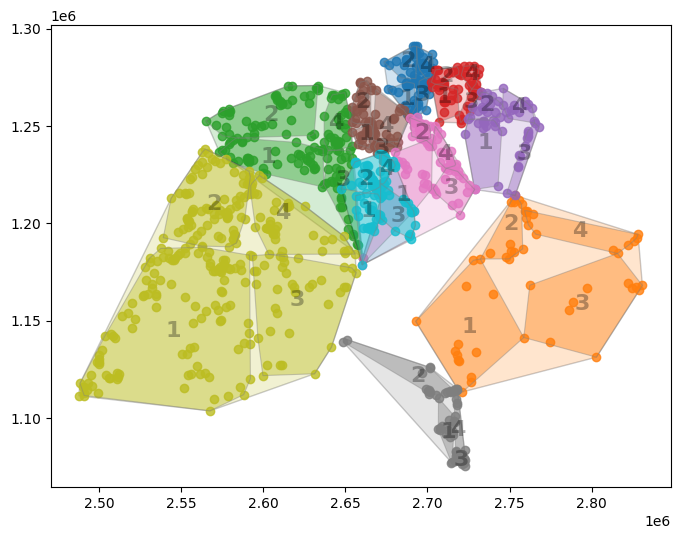

In [84]:
pop.plot()